In [4]:
import os
import time
from interpolation import *
import numpy as np
import pandas as pd
from scipy import fftpack
from matplotlib import pyplot as plt

In [5]:
import csv
from numpy import arange, ones, pi
from scipy.fftpack import fft, fftfreq, ifft
import warnings
warnings.filterwarnings('ignore')
import copy
## csv 한글 깨질때 font 설정
import matplotlib.font_manager as fm
font_path = r'.\NanumBrush.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [6]:
def draw_graph(norm_value, title, y_label, savepath):
    period = ['0~3분', '3~6분', '6~9분', '9~12분', '12~15분', '15~18분', '18~21분', '21~24분', '24~27분', '27~30분', '30~33분']
    plt.rcParams["font.family"] = 'Malgun Gothic'

    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(1, 1, 1)

    for i, x in enumerate(norm_value):
        ax.bar(period[i], x, color='b', alpha=0.5)

    plt.xticks(rotation=20)
    plt.title(savepath.split('/')[-1].split('.')[0])
    plt.ylim(0.08, np.max(norm_value) + np.max(norm_value)*0.2)
    plt.xlabel('구간')
    plt.ylabel(f'{y_label}')
    plt.tight_layout()
    fig.canvas.draw()
    img = np.array(fig.canvas.renderer._renderer)
    spl = title.split('.')[0]
    plt.savefig(f'{savepath}')
    plt.imshow(img)

In [7]:
def normalize_data(data):
    # 정규화
    frame_norm = []
    sum_data = 0
    for i in range(len(data)):  # 열 길이(사람 수)
        if data[i] is not None:
            sum_data += data[i]
        else:
            pass

    # sum_data = np.sum(data)
    for data_value in (data):
        if data_value is not None:
            norm_data = data_value / sum_data
            frame_norm.append(norm_data)
        else:
            pass
    
    return frame_norm

In [8]:
def search(dirname):
    for (path, dir, files) in os.walk(dirname):
        for filename in files:
            ext = os.path.splitext(filename)[-1]
            if ext == '.py':
                print("%s/%s" % (path, filename))

In [9]:
def get_filtered_data(in_data, high_filter_value, low_filter_value):
    sig_fft = fftpack.fft(in_data)
    sample_freq = fftpack.fftfreq(in_data.size)
    high_freq_fft = sig_fft.copy()

    # 원래는 최적의 필터 값 찾아주는 코드인데 이거로하면 완전 뭉개지는 데이터 존재
    # power = np.abs(sig_fft)
    # pos_mask = np.where(sample_freq > 0)
    # freqs = sample_freq[pos_mask]
    # peak_freq = freqs[power[pos_mask].argmax()]
    # high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
    low_value1 = np.max(high_freq_fft)
    print('len', np.count_nonzero(high_freq_fft == 0))
    high_freq_fft[np.abs(sample_freq) > high_filter_value] = 0
    print('len', np.count_nonzero(high_freq_fft == 0))
    
    high_freq_fft[np.abs(sample_freq) < low_filter_value] = 0
    
    
    print('len', np.count_nonzero(high_freq_fft == 0))
    low_value2 = np.max(high_freq_fft)
#     high_freq_fft[np.abs(sample_freq) < low_filter_value] = 0
#     low_value2 = np.max(np.abs(sample_freq))
    filtered_data = fftpack.ifft(high_freq_fft)
    
    return filtered_data, low_value1, low_value2

In [11]:
# csvs_dir = 'H:/otos/analysis_code/[csvs]2세대 마스크 데이터'
csvs_dir = './csv_renew'
# csvs_dir = './csv_good'

save_csv_dir = './pupil_rate'
# csvs_name = os.listdir('./[csvs]2세대 마스크 데이터')
kyung_list=[]
for (path, directory, files) in os.walk(str(csvs_dir)):
    df = 1
    new_name = 1
    val_name = 1
    test_name = 1
    num = 0

    for filename in files:
        ext = os.path.splitext(filename)[-1]  ## 확장자
        tt = os.path.splitext(filename)[0]  ## 파일명
        kkk = os.path.splitext(path)
        kyung_list.append(filename)
# kyung_list = ['전태식가.csv', '강동휘가.csv', '조가영가.csv']

csvs_name = kyung_list
print(len(kyung_list))
save_cr_list = [[] for i in range(len(kyung_list))]



section_minute = 3


# average_change_rate_list = [[] for _ in range(len(csvs_name))]
# data = [[] for _ in range(len(csvs_name))]
# print(data)
# print(np.shape(data))
# print(np.shape(average_change_rate_list))
# print(average_change_rate_list)

36


In [91]:
print(len(kyung_list))

28


## 초기화

In [87]:
my_array = []
avg_col = []
sum_column = 0
last_column=[]
longest_col = []
real_length = len(kyung_list)
count_over_change_rate = 0
over_change_rate_list = []

## fft 계산 및 zero_crossing

[]
강동휘가_renew.csv
avg of  강동휘가_renew  :  58.584311124715164
before 58806
<class 'list'>
[66, 66, 67, 67, 68, 69, 68, 68, 69, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 69, 69, 68, 69, 70, 70, 70]
middle 58806
after 56432
len 0
len 55867
len 55867
low_val= (3445176-0j) 
 after highpass =  (3445176-0j)
기울기 너무 클때 제외 2
프레임 [2124, 3136]
0  : 큰기울기 :  0.06883029010581221 0.0009713217105621456 
avg 0.023249264001738983 fir_avg 0.02625482141433906 value [0.09764124689153526, 0.08110180726634611]
길이 42
section =  0
기울기 너무 클때 제외 2
프레임 []
1  : 큰기울기 :  0.0851893630586787 0.008091786691794523 
avg 0.03266624725052516 fir_avg 0.03266624725052516 value []
길이 39
section =  1
기울기 너무 클때 제외 2
프레임 []
2  : 큰기울기 :  0.09235040628375388 0.006155303436326345 
avg 0.038412217161429695 fir_avg 0.038412217161429695 value []
길이 42
section =  2
기울기 너무 클때 제외 2
프레임 []
3  : 큰기울기 :  0.08199983318944461 0.006003978990624452 
avg 0.03535238264393193 fir_avg 0.03535238264393193 value []
길이 39
section =  3
기울기 

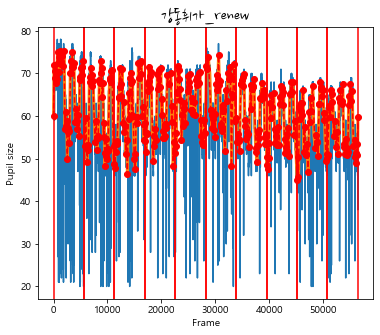

공경환가_renew.csv
avg of  공경환가_renew  :  88.60275680380119
before 42513
<class 'list'>
[114, 114, 114, 114, 114, 114, 114, 114, 115, 115, 114, 115, 115, 114, 114, 114, 115, 114, 115, 115, 115, 114, 114, 114, 114, 114, 114, 114, 114, 114]
middle 42513
after 36038
len 0
len 35677
len 35677
low_val= (3766827.999999999-0j) 
 after highpass =  (3766827.999999999-0j)
기울기 너무 클때 제외 1
프레임 [1717]
0  : 큰기울기 :  0.08646142261071287 0.0001881006210324317 
avg 0.030560270655298784 fir_avg 0.03592687792055486 value [0.13789241596042004]
길이 19
section =  0
기울기 너무 클때 제외 2
프레임 [5692]
1  : 큰기울기 :  0.0990347193177516 0.003151189160482204 
avg 0.03322245161991599 fir_avg 0.036928333842916446 value [0.12586950719492754]
길이 24
section =  1
기울기 너무 클때 제외 2
프레임 []
2  : 큰기울기 :  0.09846574410335668 0.0051794869830501964 
avg 0.04569106182664381 fir_avg 0.04569106182664381 value []
길이 20
section =  2
기울기 너무 클때 제외 3
프레임 [12363]
3  : 큰기울기 :  0.107404617147516 0.0009672057672967258 
avg 0.0429872068846078 fir_avg 0.04738

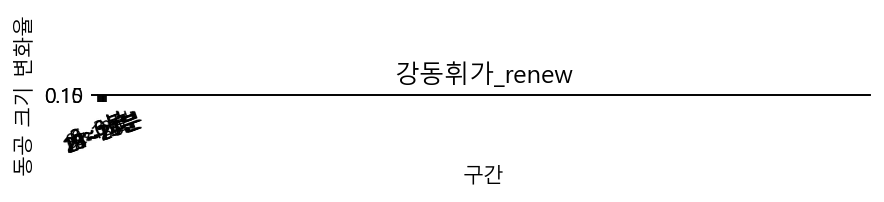

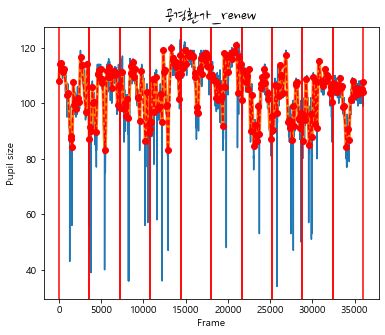

권한상가_renew.csv
avg of  권한상가_renew  :  56.141974477255125
before 59398
<class 'list'>
[0, 0, 0, 97, 97, 97, 97, 0, 0, 0, 0, 0, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98]
middle 59398
after 44872
len 0
len 44423
len 44423
low_val= (3336783-0j) 
 after highpass =  (3336783-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.056931289911089505 0.0017932353332894154 
avg 0.02082015332856017 fir_avg 0.02082015332856017 value []
길이 38
section =  0
기울기 너무 클때 제외 1
프레임 [8564]
1  : 큰기울기 :  0.06938772134403486 0.001146044967797266 
avg 0.028841230797612007 fir_avg 0.030836073521660214 value [0.09467104069120283]
길이 32
section =  1
기울기 너무 클때 제외 2
프레임 [9134]
2  : 큰기울기 :  0.08518700743480644 0.005359872704562463 
avg 0.03261605711596646 fir_avg 0.03885004665644156 value [0.2134017537897442]
길이 28
section =  2
기울기 너무 클때 제외 2
프레임 []
3  : 큰기울기 :  0.06469366782680161 0.0004981495972238292 
avg 0.025955419385517466 fir_avg 0.025955419385517466 value []
길이 33
section =  3
기울기 너무 클때 제외 3
프

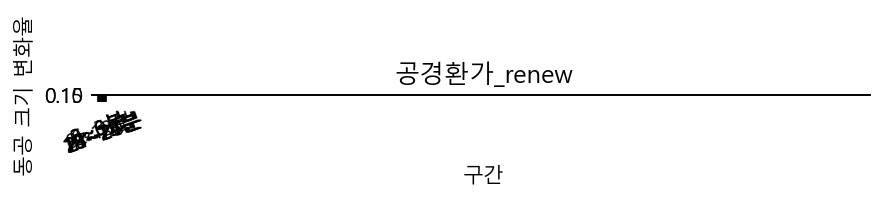

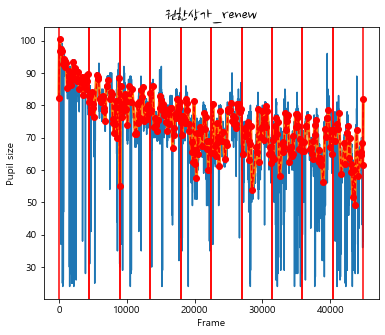

김규하가_renew.csv
avg of  김규하가_renew  :  48.66242049377092
before 57071
<class 'list'>
[0, 0, 0, 0, 0, 69, 68, 70, 69, 69, 70, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
middle 57071
after 48250
len 0
len 47767
len 47767
low_val= (2778519-0j) 
 after highpass =  (2778519-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.051864493011912094 0.0023291264967830534 
avg 0.0204469148088488 fir_avg 0.0204469148088488 value []
길이 36
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.050574082246102985 0.0017965843612380184 
avg 0.022772065613846117 fir_avg 0.022772065613846117 value []
길이 29
section =  1
기울기 너무 클때 제외 0
프레임 []
2  : 큰기울기 :  0.050856143445459044 0.002835131881386636 
avg 0.02001684125232253 fir_avg 0.02001684125232253 value []
길이 24
section =  2
기울기 너무 클때 제외 0
프레임 []
3  : 큰기울기 :  0.0577061543094008 1.820649735506663e-05 
avg 0.022242265821573376 fir_avg 0.022242265821573376 value []
길이 28
section =  3
기울기 너무 클때 제외 0
프레임 []
4  : 큰기울기 :  0.06105672163730165 0.00

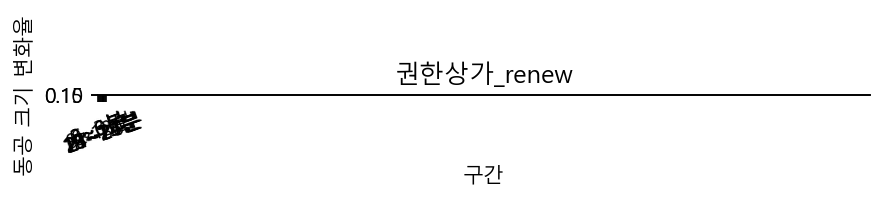

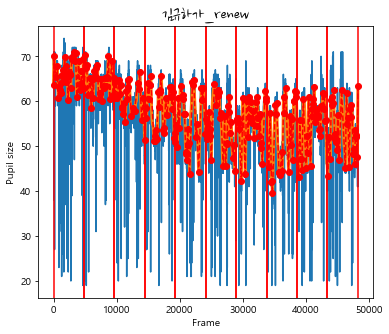

김병렬가_renew.csv
avg of  김병렬가_renew  :  44.94647068593257
before 60210
<class 'list'>
[68, 68, 68, 68, 68, 68, 67, 68, 68, 68, 68, 67, 67, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66]
middle 60210
after 55765
len 0
len 55208
len 55208
low_val= (2708028.9999999995-0j) 
 after highpass =  (2708028.9999999995-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.07663000051668645 0.003021013982593672 
avg 0.028110856633327953 fir_avg 0.028110856633327953 value []
길이 40
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.07474026671258832 0.0003515900999154553 
avg 0.029604620503761364 fir_avg 0.029604620503761364 value []
길이 46
section =  1
기울기 너무 클때 제외 0
프레임 []
2  : 큰기울기 :  0.03476989438841923 0.0007044238740222472 
avg 0.01602950806273547 fir_avg 0.01602950806273547 value []
길이 38
section =  2
기울기 너무 클때 제외 0
프레임 []
3  : 큰기울기 :  0.04762441423110358 0.00015116142882444126 
avg 0.015925945939013374 fir_avg 0.015925945939013374 value []
길이 38
section =  3
기울기 너무 클때 제외 2
프레임 [25229, 25

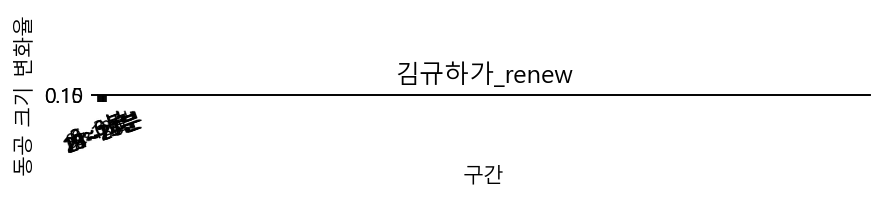

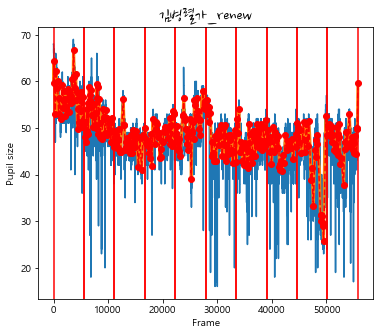

김종설가_renew.csv
avg of  김종설가_renew  :  36.56729370102207
before 57041
<class 'list'>
[55, 55, 55, 55, 54, 55, 55, 55, 55, 0, 0, 0, 53, 53, 53, 53, 53, 52, 52, 52, 51, 51, 51, 52, 51, 51, 51, 51, 51, 51]
middle 57041
after 53204
len 0
len 52671
len 52671
low_val= (2086928-0j) 
 after highpass =  (2086928-0j)
기울기 너무 클때 제외 2
프레임 [4654, 4795]
0  : 큰기울기 :  0.05419970289391084 0.0001736293596879596 
avg 0.02038511690817425 fir_avg 0.025826038576825177 value [0.1348096944000277, 0.09095187615045247]
길이 32
section =  0
기울기 너무 클때 제외 3
프레임 [5846]
1  : 큰기울기 :  0.06317220694562788 0.0010679085972429016 
avg 0.02226524165943638 fir_avg 0.024076733604505254 value [0.07661000001150263]
길이 29
section =  1
기울기 너무 클때 제외 4
프레임 [12660]
2  : 큰기울기 :  0.0781986592538914 0.00028621101927181296 
avg 0.02852927940784707 fir_avg 0.031233038794717748 value [0.1366796548826746]
길이 39
section =  2
기울기 너무 클때 제외 4
프레임 []
3  : 큰기울기 :  0.0486848585192139 0.0029934098853914293 
avg 0.016399562513460066 fir_avg 0.01639956

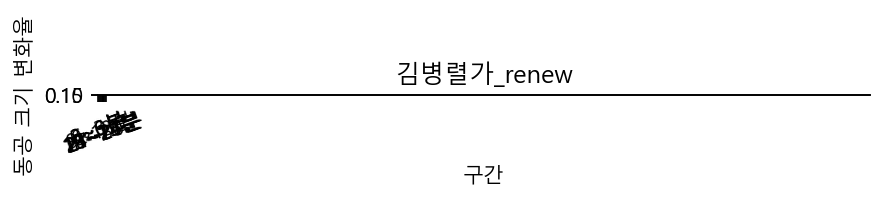

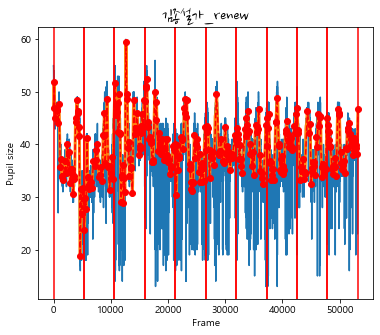

김준수가_renew.csv
avg of  김준수가_renew  :  53.69563581050354
before 63769
<class 'list'>
[75, 75, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 75, 75, 76, 76, 75, 76, 76, 76, 76, 76, 76, 76]
middle 63769
after 58360
len 0
len 57777
len 57777
low_val= (3424157.999999999-0j) 
 after highpass =  (3424157.999999999-0j)
기울기 너무 클때 제외 3
프레임 [259, 3956, 5734]
0  : 큰기울기 :  0.12339417360358479 1.4302587587167181e-05 
avg 0.03153633814979093 fir_avg 0.04180682023917949 value [0.1560534200662576, 0.12609987608940998, 0.15138162724352788]
길이 30
section =  0
기울기 너무 클때 제외 5
프레임 [7743, 9350]
1  : 큰기울기 :  0.08875712223766288 0.0016804641368990403 
avg 0.02591201336431927 fir_avg 0.029671948298804998 value [0.10648586646252184, 0.10325542751451729]
길이 40
section =  1
기울기 너무 클때 제외 6
프레임 [16639]
2  : 큰기울기 :  0.08806892680307209 0.002945112188283835 
avg 0.030601061036419918 fir_avg 0.03326032465362881 value [0.12101602402152234]
길이 33
section =  2
기울기 너무 클때 제외 7
프레임 [18459]
3  : 큰기울기 :  0.09

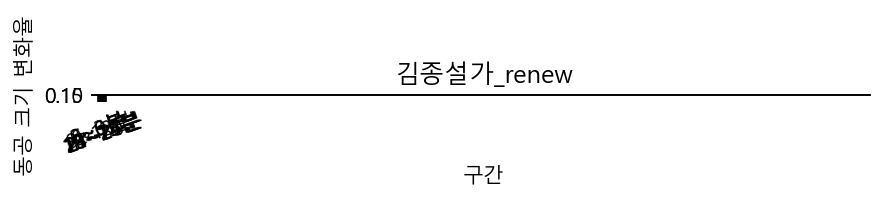

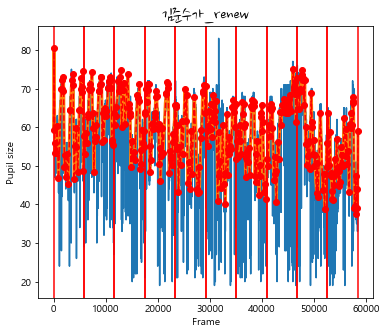

김지용가_renew.csv
avg of  김지용가_renew  :  49.15875058305052
before 62173
<class 'list'>
[61, 61, 62, 61, 62, 0, 0, 0, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 59, 60, 60, 60, 61, 63]
middle 62173
after 55330
len 0
len 54777
len 54777
low_val= (3056653-0j) 
 after highpass =  (3056653-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.045225969314920005 0.0022017882848058908 
avg 0.02281082433806591 fir_avg 0.02281082433806591 value []
길이 36
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.050953701141150526 0.0008761308013906686 
avg 0.02138687439487791 fir_avg 0.02138687439487791 value []
길이 36
section =  1
기울기 너무 클때 제외 0
프레임 []
2  : 큰기울기 :  0.0641268416024774 0.002363244584969948 
avg 0.024842130673237612 fir_avg 0.024842130673237612 value []
길이 40
section =  2
기울기 너무 클때 제외 1
프레임 [20260]
3  : 큰기울기 :  0.04358242504373571 0.0032609191954499294 
avg 0.018656974679687573 fir_avg 0.020163111137487272 value [0.07589016007607619]
길이 37
section =  3
기울기 너무 클때 제외 2
프레임 [22873]
4  : 

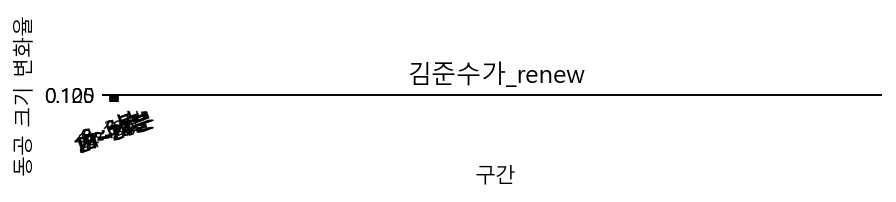

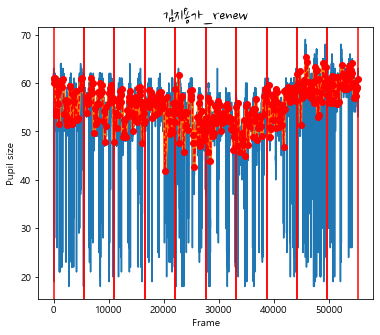

김창용가_renew.csv
avg of  김창용가_renew  :  54.924561550725855
before 59585
<class 'list'>
[73, 73, 72, 72, 72, 70, 0, 0, 0, 0, 68, 69, 0, 0, 0, 67, 68, 68, 68, 68, 68, 67, 68, 68, 68, 69, 69, 69, 70, 70]
middle 59585
after 50756
len 0
len 50249
len 50249
low_val= (3273229-0j) 
 after highpass =  (3273229-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.07377643485751367 0.0028035502603289894 
avg 0.028876699302363276 fir_avg 0.028876699302363276 value []
길이 30
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.10375713242071112 0.0030860283924772215 
avg 0.0377353840297122 fir_avg 0.0377353840297122 value []
길이 28
section =  1
기울기 너무 클때 제외 0
프레임 []
2  : 큰기울기 :  0.10077673946589018 0.00033573643813538794 
avg 0.03917316047085643 fir_avg 0.03917316047085643 value []
길이 39
section =  2
기울기 너무 클때 제외 1
프레임 [19762]
3  : 큰기울기 :  0.08137156652788036 9.129485239690717e-05 
avg 0.03176790557369699 fir_avg 0.03446228982875649 value [0.1072106647153628]
길이 27
section =  3
기울기 너무 클때 제외 1
프레임 []
4  : 큰기울기 :  0.10

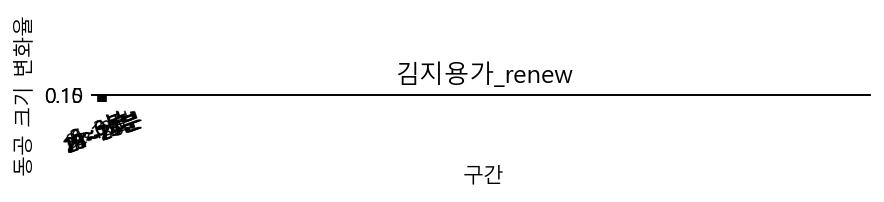

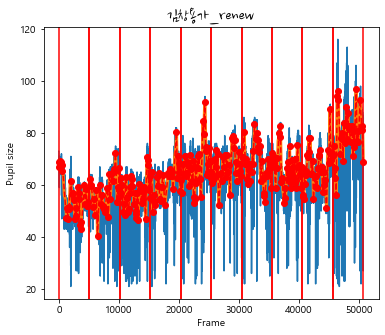

방희철가_renew.csv
avg of  방희철가_renew  :  73.39601322505055
before 62306
<class 'list'>
[83, 83, 83, 83, 82, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 84, 85, 85, 85, 84, 84, 84, 84]
middle 62306
after 57476
len 0
len 56901
len 56901
low_val= (4574869-0j) 
 after highpass =  (4574869-0j)
기울기 너무 클때 제외 1
프레임 [4893]
0  : 큰기울기 :  0.06534977444544172 0.0038629655699871307 
avg 0.020848640109105483 fir_avg 0.022024809977908736 value [0.06671926499243237]
길이 38
section =  0
기울기 너무 클때 제외 1
프레임 []
1  : 큰기울기 :  0.039217530146075756 0.003143037849625204 
avg 0.016266078100122705 fir_avg 0.016266078100122705 value []
길이 36
section =  1
기울기 너무 클때 제외 1
프레임 []
2  : 큰기울기 :  0.05721146433627964 5.797379902787725e-05 
avg 0.02361357491622327 fir_avg 0.02361357491622327 value []
길이 31
section =  2
기울기 너무 클때 제외 1
프레임 []
3  : 큰기울기 :  0.08307293767689615 0.0032156433519760813 
avg 0.030260806193652148 fir_avg 0.030260806193652148 value []
길이 44
section =  3
기울기 너무 클때 제외 3
프레임 [24271, 24413]
4  : 큰기울기

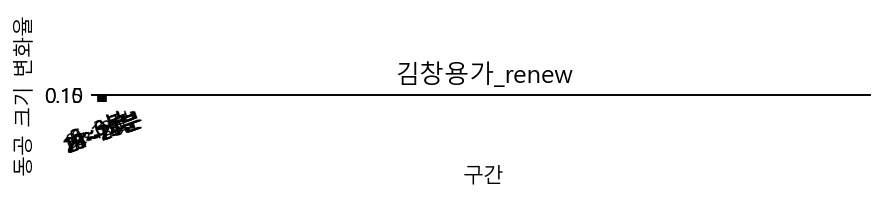

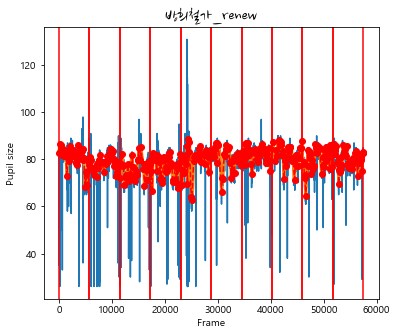

서병희가_renew.csv
avg of  서병희가_renew  :  44.854379616814796
before 59971
<class 'list'>
[77, 77, 77, 77, 76, 77, 77, 77, 77, 77, 77, 77, 76, 0, 0, 0, 0, 75, 75, 75, 75, 75, 76, 76, 76, 75, 76, 75, 75, 75]
middle 59971
after 49618
len 0
len 49121
len 49121
low_val= (2690746.999999999-0j) 
 after highpass =  (2690746.999999999-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.05473157261265958 0.0011368467413546564 
avg 0.025463378968208692 fir_avg 0.025463378968208692 value []
길이 37
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.06032863432652765 0.0037866321799757147 
avg 0.03182495229632115 fir_avg 0.03182495229632115 value []
길이 34
section =  1
기울기 너무 클때 제외 0
프레임 []
2  : 큰기울기 :  0.0872117363669265 0.002117221753617926 
avg 0.02964156852849325 fir_avg 0.02964156852849325 value []
길이 31
section =  2
기울기 너무 클때 제외 0
프레임 []
3  : 큰기울기 :  0.08277479552078147 0.0014422267600112477 
avg 0.027849638789083322 fir_avg 0.027849638789083322 value []
길이 30
section =  3
기울기 너무 클때 제외 0
프레임 []
4  : 큰기울기 :  0.0

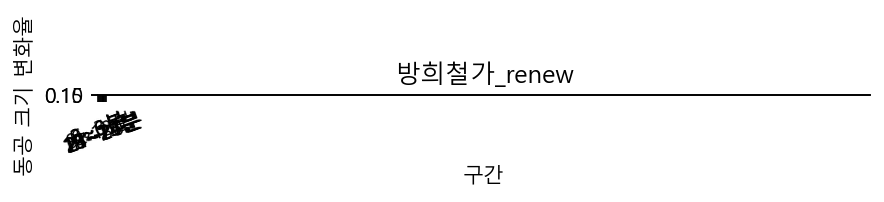

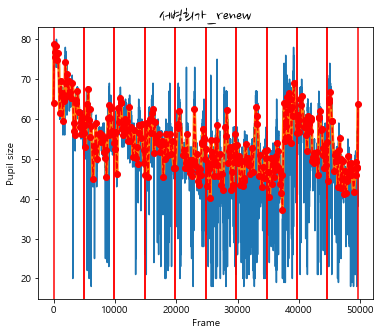

손장영가_renew.csv
avg of  손장영가_renew  :  69.295822125965
before 57254
<class 'list'>
[80, 80, 79, 79, 79, 79, 77, 77, 77, 76, 76, 76, 75, 76, 75, 75, 75, 75, 75, 74, 73, 74, 74, 74, 74, 75, 75, 75, 75, 75]
middle 57254
after 55104
len 0
len 54553
len 54553
low_val= (3967622-0j) 
 after highpass =  (3967622-0j)
기울기 너무 클때 제외 2
프레임 [1243, 3942]
0  : 큰기울기 :  0.069979455331631 0.003738813832583787 
avg 0.02078995131547621 fir_avg 0.023853040218286152 value [0.07779332222704503, 0.08018395871068543]
길이 36
section =  0
기울기 너무 클때 제외 2
프레임 []
1  : 큰기울기 :  0.05676504567442875 0.0001549244136020372 
avg 0.019864179518146972 fir_avg 0.019864179518146972 value []
길이 37
section =  1
기울기 너무 클때 제외 3
프레임 [11556]
2  : 큰기울기 :  0.09631988670539007 0.00030071354288015053 
avg 0.02995869883860507 fir_avg 0.03257863038912275 value [0.11903637155620639]
길이 33
section =  2
기울기 너무 클때 제외 3
프레임 []
3  : 큰기울기 :  0.08502782567443878 0.0010449428329412501 
avg 0.030424981550092583 fir_avg 0.030424981550092583 value []
길

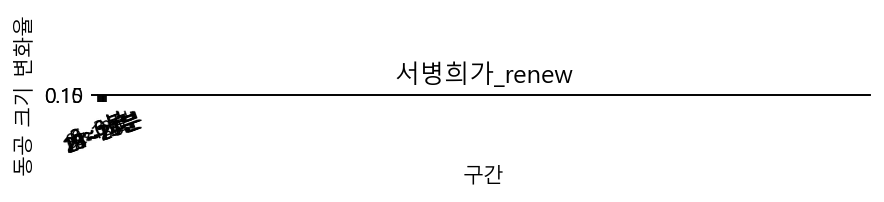

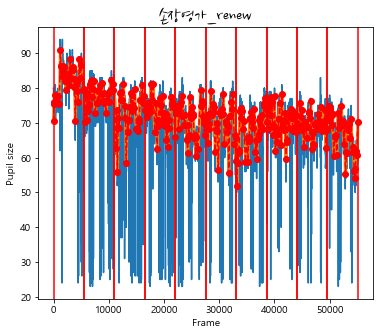

안주선가_renew.csv
avg of  안주선가_renew  :  95.83756085935106
before 58742
<class 'list'>
[105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 104, 105, 104, 104, 104, 105, 105, 104, 105, 104, 104, 104, 105, 104, 105, 104, 105, 105, 105]
middle 58742
after 53943
len 0
len 53404
len 53404
low_val= (5629806.000000001-0j) 
 after highpass =  (5629806.000000001-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.04866217262766579 0.001085491864128732 
avg 0.017103013936165663 fir_avg 0.017103013936165663 value []
길이 35
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.03220916501145614 0.0005997347088392897 
avg 0.013012529681453899 fir_avg 0.013012529681453899 value []
길이 30
section =  1
기울기 너무 클때 제외 0
프레임 []
2  : 큰기울기 :  0.05099939975569928 0.001304474820669622 
avg 0.018888192021597215 fir_avg 0.018888192021597215 value []
길이 36
section =  2
기울기 너무 클때 제외 0
프레임 []
3  : 큰기울기 :  0.06460480923392725 0.0011252739183258802 
avg 0.02421600755849957 fir_avg 0.02421600755849957 value []
길이 33
section =  3
기울기

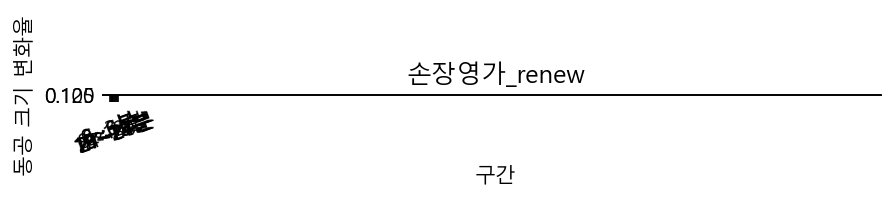

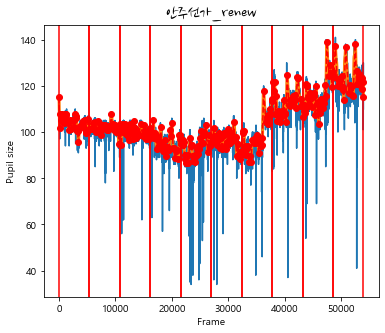

왕국가_renew.csv
avg of  왕국가_renew  :  37.18927935943061
before 62944
<class 'list'>
[62, 62, 63, 62, 62, 62, 0, 0, 0, 0, 62, 62, 62, 62, 63, 62, 62, 63, 63, 63, 62, 63, 62, 63, 63, 62, 62, 62, 0, 0]
middle 62944
after 54066
len 0
len 53525
len 53525
low_val= (2341350-0j) 
 after highpass =  (2341350-0j)
기울기 너무 클때 제외 1
프레임 [206]
0  : 큰기울기 :  0.028061800483236254 0.0013651357066859695 
avg 0.012200095176299951 fir_avg 0.013035855771557043 value [0.04312323720081235]
길이 36
section =  0
기울기 너무 클때 제외 1
프레임 []
1  : 큰기울기 :  0.046250235097206875 0.000442328221762913 
avg 0.017228360229834608 fir_avg 0.017228360229834608 value []
길이 41
section =  1
기울기 너무 클때 제외 1
프레임 []
2  : 큰기울기 :  0.04179960909255056 3.868498186392344e-05 
avg 0.01738918238988261 fir_avg 0.01738918238988261 value []
길이 34
section =  2
기울기 너무 클때 제외 2
프레임 [17370]
3  : 큰기울기 :  0.048386239560228354 0.0012763999412477745 
avg 0.016220373719722007 fir_avg 0.017083023158380315 value [0.051589000704712715]
길이 40
section =  3
기울기 너무 클때 

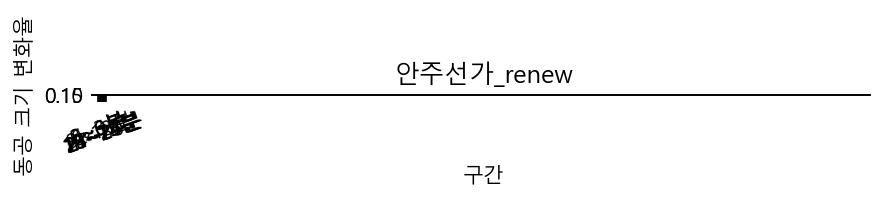

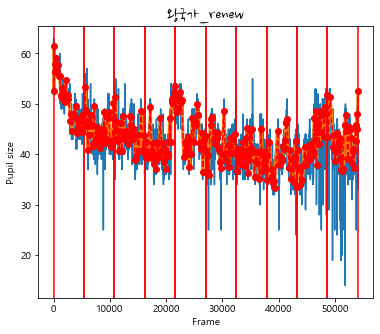

윤주원가_renew.csv
avg of  윤주원가_renew  :  55.82543987410644
before 59733
<class 'list'>
[67, 67, 67, 67, 68, 67, 68, 68, 68, 68, 68, 68, 67, 67, 66, 65, 65, 64, 64, 64, 63, 64, 64, 64, 64, 64, 63, 63, 64, 64]
middle 59733
after 51278
len 0
len 50765
len 50765
low_val= (3335139-0j) 
 after highpass =  (3335139-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.05399538483528303 0.0013833535872198523 
avg 0.02927072518882161 fir_avg 0.02927072518882161 value []
길이 34
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.08937796007930922 0.0015694903631557706 
avg 0.04297409203369271 fir_avg 0.04297409203369271 value []
길이 33
section =  1
기울기 너무 클때 제외 1
프레임 [10690]
2  : 큰기울기 :  0.08082390982192066 0.001048367918479378 
avg 0.029301079064798393 fir_avg 0.03134169146751227 value [0.09460067595164248]
길이 31
section =  2
기울기 너무 클때 제외 1
프레임 []
3  : 큰기울기 :  0.07415321030052051 0.0010497422206536705 
avg 0.02807999486825863 fir_avg 0.02807999486825863 value []
길이 31
section =  3
기울기 너무 클때 제외 3
프레임 [24350, 24511]

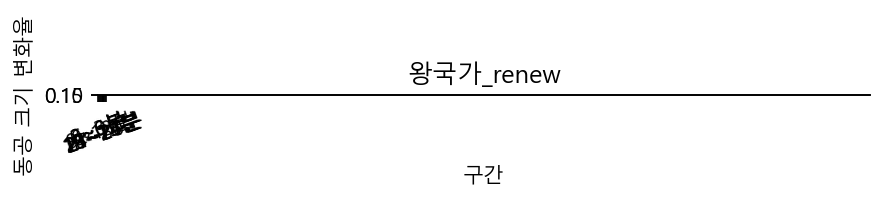

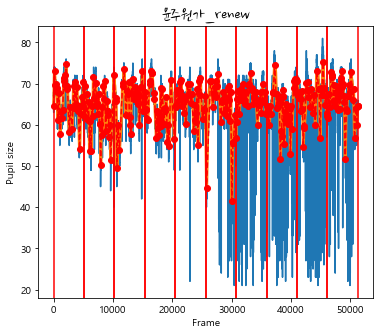

이경훈가_renew.csv
avg of  이경훈가_renew  :  40.68690973159156
before 63001
<class 'list'>
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
middle 63001
after 57869
len 0
len 57290
len 57290
low_val= (2563392-0j) 
 after highpass =  (2563392-0j)
기울기 너무 클때 제외 1
프레임 [2643]
0  : 큰기울기 :  0.05416362076396098 0.0035920688823611138 
avg 0.01887550076632101 fir_avg 0.02050294900040211 value [0.06281660308651069]
길이 26
section =  0
기울기 너무 클때 제외 1
프레임 []
1  : 큰기울기 :  0.04848174439362494 0.0012325288222930985 
avg 0.0162803301185602 fir_avg 0.0162803301185602 value []
길이 31
section =  1
기울기 너무 클때 제외 1
프레임 []
2  : 큰기울기 :  0.0577583572631048 0.0009299434640294846 
avg 0.02152021351846813 fir_avg 0.02152021351846813 value []
길이 31
section =  2
기울기 너무 클때 제외 1
프레임 []
3  : 큰기울기 :  0.0492845793779534 0.0016754171778660296 
avg 0.02141405716803919 fir_avg 0.02141405716803919 value []
길이 36
section =  3
기울기 너무 클때 제외 2
프레임 [25889]
4  : 큰기울기 :

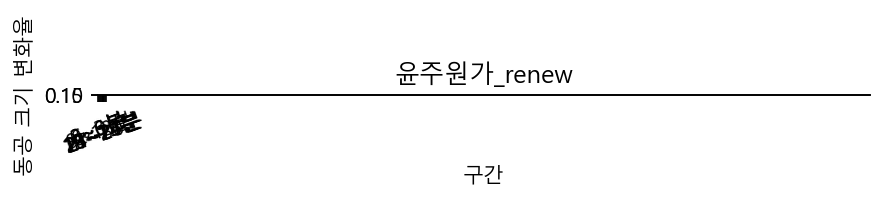

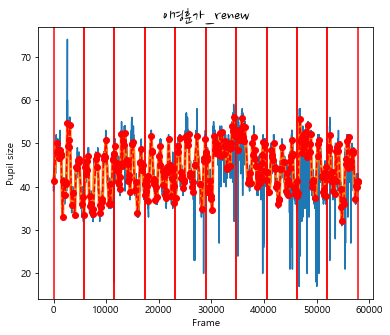

이선정가_renew.csv
avg of  이선정가_renew  :  31.997329675354365
before 54675
<class 'list'>
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
middle 54675
after 42673
len 0
len 42246
len 42246
low_val= (1753324.9999999998-0j) 
 after highpass =  (1753324.9999999998-0j)
기울기 너무 클때 제외 1
프레임 [3360]
0  : 큰기울기 :  0.05525815687055215 0.006529353544304284 
avg 0.019578085210606364 fir_avg 0.021055720843233674 value [0.06538478982205294]
길이 30
section =  0
기울기 너무 클때 제외 1
프레임 []
1  : 큰기울기 :  0.04714427194628998 1.552054518530862e-05 
avg 0.015842906532526943 fir_avg 0.015842906532526943 value []
길이 31
section =  1
기울기 너무 클때 제외 1
프레임 []
2  : 큰기울기 :  0.0710497736511711 0.0031590240572953727 
avg 0.03194441542989795 fir_avg 0.03194441542989795 value []
길이 25
section =  2
기울기 너무 클때 제외 2
프레임 [14307]
3  : 큰기울기 :  0.048496239911794144 0.0017516297456937242 
avg 0.01924779029506824 fir_avg 0.02113213741321166 value [0.0720095096030841]
길이 2

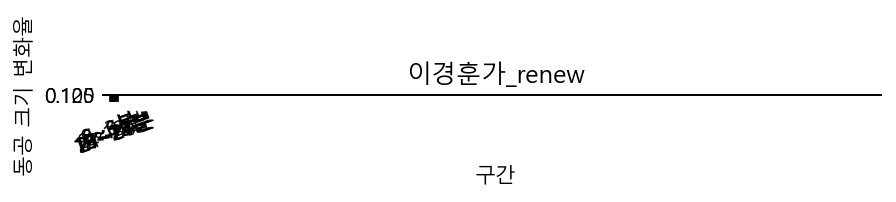

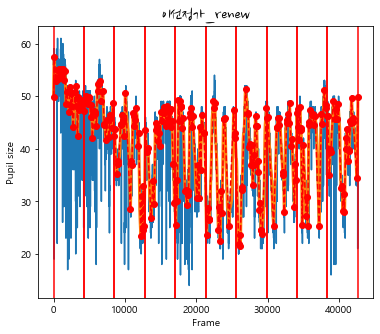

이은정가_renew.csv
avg of  이은정가_renew  :  44.15434790508376
before 55038
<class 'list'>
[60, 60, 60, 60, 60, 64, 65, 64, 65, 0, 0, 0, 0, 59, 64, 64, 0, 0, 0, 0, 59, 64, 64, 64, 64, 64, 63, 63, 0, 0]
middle 55038
after 51049
len 0
len 50538
len 50538
low_val= (2430270-0j) 
 after highpass =  (2430270-0j)
기울기 너무 클때 제외 1
프레임 [2723]
0  : 큰기울기 :  0.08341733708598435 0.001128289822458529 
avg 0.02827101413252772 fir_avg 0.030489792187627724 value [0.11036580217122775]
길이 36
section =  0
기울기 너무 클때 제외 1
프레임 []
1  : 큰기울기 :  0.07677478230210591 0.00345525943958999 
avg 0.041048732977332185 fir_avg 0.041048732977332185 value []
길이 34
section =  1
기울기 너무 클때 제외 1
프레임 []
2  : 큰기울기 :  0.08795639145854355 0.0012213318599566233 
avg 0.032910188190621636 fir_avg 0.032910188190621636 value []
길이 35
section =  2
기울기 너무 클때 제외 2
프레임 [18913]
3  : 큰기울기 :  0.08224956727642277 0.006564009000036397 
avg 0.03177728862643481 fir_avg 0.03387507124542092 value [0.11568859338587924]
길이 39
section =  3
기울기 너무 클때 제외 3
프레임 

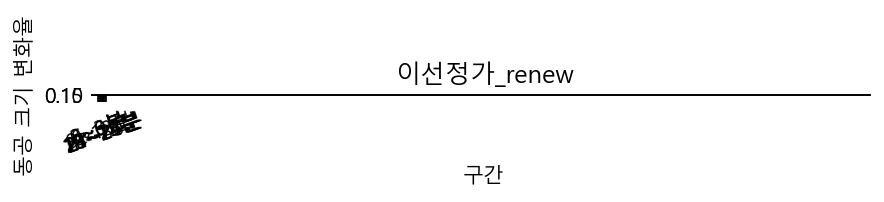

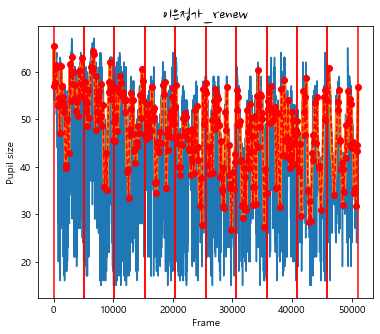

이호정가_renew.csv
avg of  이호정가_renew  :  44.77479655726169
before 55421
<class 'list'>
[74, 74, 75, 74, 75, 75, 75, 75, 75, 75, 74, 74, 74, 73, 72, 72, 71, 71, 71, 71, 70, 70, 71, 71, 70, 70, 70, 70, 70, 70]
middle 55421
after 46582
len 0
len 46117
len 46117
low_val= (2481463.9999999995-0j) 
 after highpass =  (2481463.9999999995-0j)
기울기 너무 클때 제외 1
프레임 [2102]
0  : 큰기울기 :  0.08665785941086188 0.004906926832237656 
avg 0.029130029114647675 fir_avg 0.031176265820299212 value [0.09870207710679987]
길이 33
section =  0
기울기 너무 클때 제외 1
프레임 []
1  : 큰기울기 :  0.07351377676665734 0.0017884405054619634 
avg 0.029704996700976455 fir_avg 0.029704996700976455 value []
길이 28
section =  1
기울기 너무 클때 제외 1
프레임 []
2  : 큰기울기 :  0.08278561676571532 0.004661760445283214 
avg 0.033283467124874885 fir_avg 0.033283467124874885 value []
길이 31
section =  2
기울기 너무 클때 제외 1
프레임 []
3  : 큰기울기 :  0.06368791453124152 0.004779195078589874 
avg 0.023770879297474092 fir_avg 0.023770879297474092 value []
길이 28
section =  3
기울기 너무 

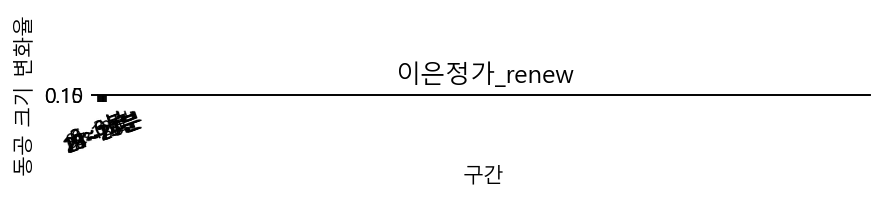

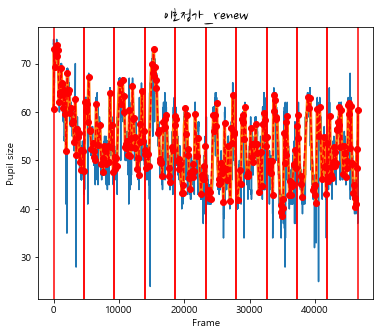

전태식가_renew.csv
avg of  전태식가_renew  :  78.8735099442866
before 63001
<class 'list'>
[97, 97, 98, 98, 98, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 99, 98, 98, 98, 0, 0, 0, 0, 0, 98, 98]
middle 63001
after 55683
len 0
len 55126
len 55126
low_val= (4971370-0j) 
 after highpass =  (4971370-0j)
기울기 너무 클때 제외 1
프레임 [3665]
0  : 큰기울기 :  0.08683125929697862 0.002176312716620643 
avg 0.02914605554489653 fir_avg 0.03067015315171322 value [0.09620635024483108]
길이 43
section =  0
기울기 너무 클때 제외 1
프레임 []
1  : 큰기울기 :  0.11888691613199454 0.0024390880105435242 
avg 0.04417018091193331 fir_avg 0.04417018091193331 value []
길이 39
section =  1
기울기 너무 클때 제외 2
프레임 [12526]
2  : 큰기울기 :  0.06409035594724992 0.0023260995474844648 
avg 0.030002967658083357 fir_avg 0.03230217732828775 value [0.10817609644503273]
길이 33
section =  2
기울기 너무 클때 제외 2
프레임 []
3  : 큰기울기 :  0.08804110876998257 5.265414389536242e-05 
avg 0.03273629263921277 fir_avg 0.03273629263921277 value []
길이 38
section =  3
기울기 너무 클때 제외 2
프

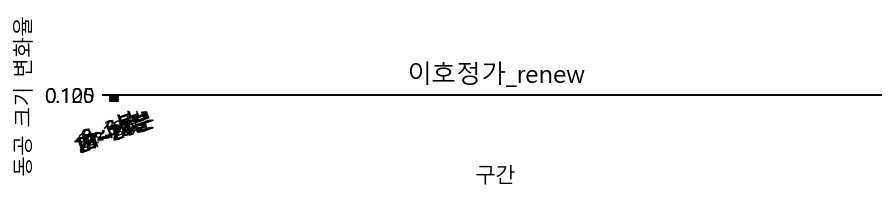

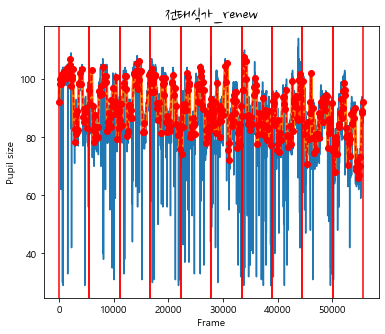

조가영가_renew.csv
avg of  조가영가_renew  :  42.24209172889954
before 56776
<class 'list'>
[53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 53, 54, 54, 53, 0, 0, 0, 0, 0, 53, 53, 54, 54, 54, 54, 53, 53, 53, 53]
middle 56776
after 49900
len 0
len 49401
len 49401
low_val= (2398525-0j) 
 after highpass =  (2398525-0j)
기울기 너무 클때 제외 3
프레임 [172, 394, 538]
0  : 큰기울기 :  0.03296121148065579 0.0009017205316929186 
avg 0.00988213186236481 fir_avg 0.01240253309328876 value [0.04097689182772247, 0.03830268948120239, 0.038580857360507884]
길이 32
section =  0
기울기 너무 클때 제외 4
프레임 [5238]
1  : 큰기울기 :  0.02277235467872491 0.0008663682671453899 
avg 0.007630171404445088 fir_avg 0.008360389287162264 value [0.03172736153411187]
길이 32
section =  1
기울기 너무 클때 제외 5
프레임 [14431]
2  : 큰기울기 :  0.0393429050257302 0.0009876188488068276 
avg 0.011574022645776661 fir_avg 0.01315945311357141 value [0.06547865855079821]
길이 33
section =  2
기울기 너무 클때 제외 5
프레임 []
3  : 큰기울기 :  0.03059115101379942 0.002063670095064108 
avg 0.0106948732375

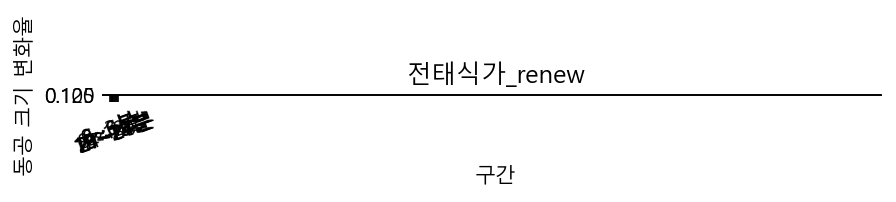

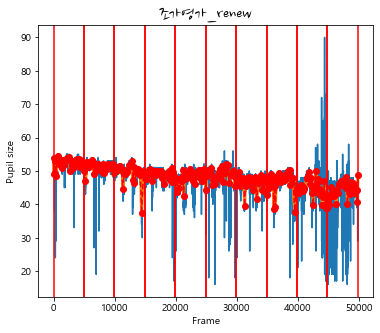

조윤열가_renew.csv
avg of  조윤열가_renew  :  66.56675869685257
before 63385
<class 'list'>
[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 52, 0, 0, 0, 0, 0, 0, 83, 88, 89, 89, 88, 89, 89, 89, 88]
middle 63385
after 58985
len 0
len 58396
len 58396
low_val= (4219334-0j) 
 after highpass =  (4219334-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.047579622171163835 0.0023884417353906193 
avg 0.019718330671060415 fir_avg 0.019718330671060415 value []
길이 39
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.04949674191464941 0.0023571306865193264 
avg 0.02116846025218715 fir_avg 0.02116846025218715 value []
길이 36
section =  1
기울기 너무 클때 제외 0
프레임 []
2  : 큰기울기 :  0.06209715877539332 0.0006487613231802067 
avg 0.02329953763045646 fir_avg 0.02329953763045646 value []
길이 46
section =  2
기울기 너무 클때 제외 0
프레임 []
3  : 큰기울기 :  0.07153581199123565 0.0022754078130753897 
avg 0.030489318523816988 fir_avg 0.030489318523816988 value []
길이 42
section =  3
기울기 너무 클때 제외 0
프레임 []
4  : 큰기울기 :  0.05540027702327512 0.0

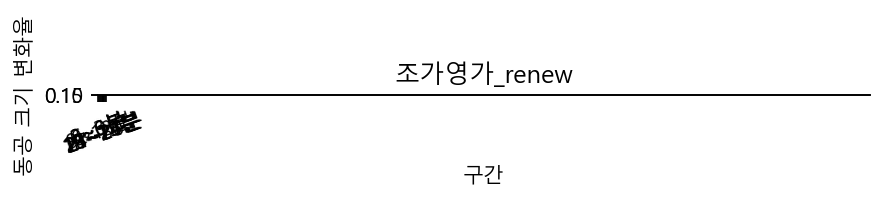

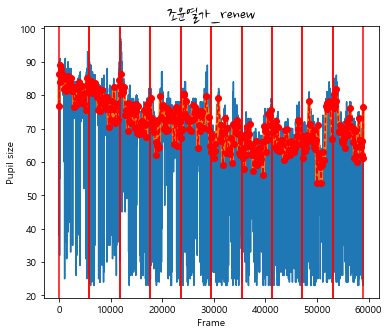

조주완가_renew.csv
avg of  조주완가_renew  :  41.25137423606132
before 58578
<class 'list'>
[66, 66, 66, 67, 66, 67, 67, 67, 67, 68, 68, 68, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 67, 67, 67, 67, 67, 67]
middle 58578
after 48936
len 0
len 48447
len 48447
low_val= (2417122-0j) 
 after highpass =  (2417122-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.08839104087620842 0.010317142766300065 
avg 0.031337628267509 fir_avg 0.031337628267509 value []
길이 37
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.04798701177572553 0.0012793761919460296 
avg 0.02377028865414195 fir_avg 0.02377028865414195 value []
길이 31
section =  1
기울기 너무 클때 제외 1
프레임 [12822]
2  : 큰기울기 :  0.058935757712717175 0.0026006983790476247 
avg 0.021274058270322443 fir_avg 0.023354426917237978 value [0.08784585497161959]
길이 31
section =  2
기울기 너무 클때 제외 1
프레임 []
3  : 큰기울기 :  0.0530922143133867 8.768238194060511e-05 
avg 0.018513077650403102 fir_avg 0.018513077650403102 value []
길이 36
section =  3
기울기 너무 클때 제외 1
프레임 []
4  : 큰기울기 : 

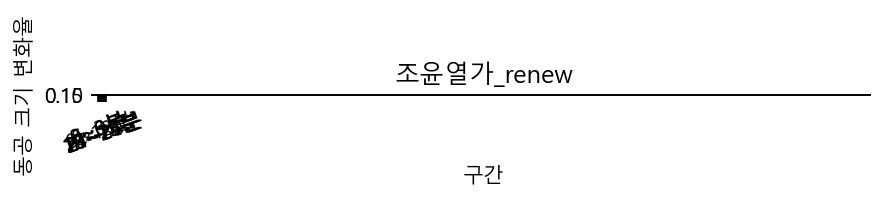

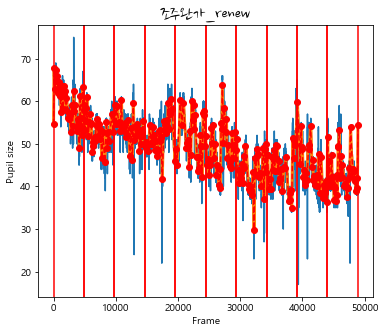

최명호가_renew.csv
avg of  최명호가_renew  :  41.20681448506121
before 58405
<class 'list'>
[65, 65, 65, 65, 64, 64, 65, 65, 65, 65, 64, 64, 65, 65, 64, 65, 65, 65, 65, 64, 0, 0, 0, 0, 0, 64, 64, 64, 64, 65]
middle 58405
after 52095
len 0
len 51574
len 51574
low_val= (2408398-0j) 
 after highpass =  (2408398-0j)
기울기 너무 클때 제외 1
프레임 [234]
0  : 큰기울기 :  0.054601433993709036 0.00046988597442254587 
avg 0.020496535681313627 fir_avg 0.02253687868660512 value [0.10006991288768183]
길이 38
section =  0
기울기 너무 클때 제외 1
프레임 []
1  : 큰기울기 :  0.04431553632698336 0.0010061632781473108 
avg 0.019638322888293005 fir_avg 0.019638322888293005 value []
길이 34
section =  1
기울기 너무 클때 제외 1
프레임 []
2  : 큰기울기 :  0.05084231012549493 6.705749851931841e-05 
avg 0.019819684456435456 fir_avg 0.019819684456435456 value []
길이 34
section =  2
기울기 너무 클때 제외 1
프레임 []
3  : 큰기울기 :  0.052791950825544186 0.00043407940305600586 
avg 0.022457943878229154 fir_avg 0.022457943878229154 value []
길이 34
section =  3
기울기 너무 클때 제외 1
프레임 []
4  : 큰기

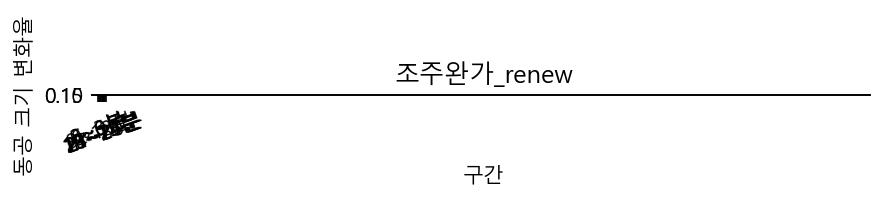

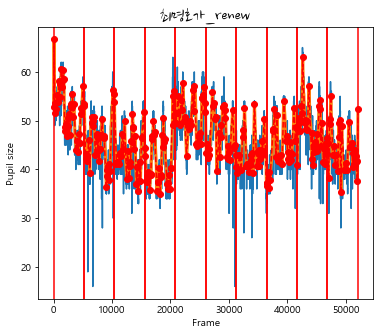

최정용가_renew.csv
avg of  최정용가_renew  :  45.51549975397216
before 63001
<class 'list'>
[59, 59, 59, 59, 60, 59, 60, 59, 59, 59, 59, 59, 60, 59, 59, 59, 60, 59, 59, 60, 59, 59, 59, 60, 59, 59, 59, 59, 60, 59]
middle 63001
after 57122
len 0
len 56551
len 56551
low_val= (2869127-0j) 
 after highpass =  (2869127-0j)
기울기 너무 클때 제외 2
프레임 [362, 2013]
0  : 큰기울기 :  0.04406686230935851 0.0011747590928843834 
avg 0.016108675893641164 fir_avg 0.01816749435400102 value [0.059835819127455996, 0.06502836337601987]
길이 43
section =  0
기울기 너무 클때 제외 3
프레임 [8121]
1  : 큰기울기 :  0.05274610724108368 0.0009741550547847311 
avg 0.017343599061549805 fir_avg 0.018465622878820663 value [0.057736456483300724]
길이 35
section =  1
기울기 너무 클때 제외 4
프레임 [14995]
2  : 큰기울기 :  0.042310111505302346 0.002457168402792753 
avg 0.015777764341614212 fir_avg 0.016796025878187366 value [0.0544717027313941]
길이 37
section =  2
기울기 너무 클때 제외 5
프레임 [22752]
3  : 큰기울기 :  0.051371121850320105 0.002274184790564696 
avg 0.018481483749596118 fir_a

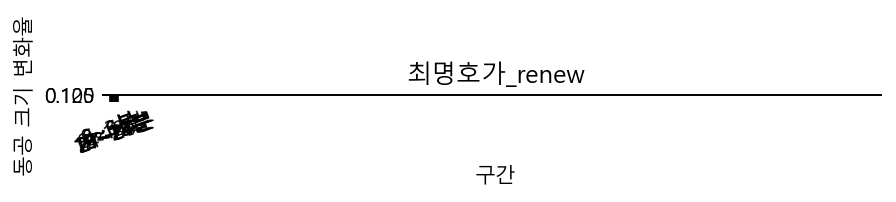

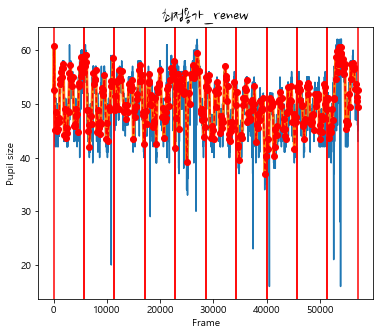

한기춘가_renew.csv
avg of  한기춘가_renew  :  52.37426592752217
before 60791
<class 'list'>
[70, 70, 70, 70, 70, 70, 70, 70, 69, 69, 69, 68, 68, 68, 68, 68, 68, 0, 0, 0, 0, 68, 68, 68, 68, 69, 69, 69, 69, 70]
middle 60791
after 54847
len 0
len 54298
len 54298
low_val= (3183884-0j) 
 after highpass =  (3183884-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.08168198774895849 0.0005568169172695485 
avg 0.030470096985067873 fir_avg 0.030470096985067873 value []
길이 38
section =  0
기울기 너무 클때 제외 1
프레임 [7211]
1  : 큰기울기 :  0.0503981294174461 0.003471351142020062 
avg 0.023957416891217186 fir_avg 0.026584531235122912 value [0.13429621933525748]
길이 41
section =  1
기울기 너무 클때 제외 1
프레임 []
2  : 큰기울기 :  0.10196233159413688 0.0011665138173347874 
avg 0.03550729810124791 fir_avg 0.03550729810124791 value []
길이 47
section =  2
기울기 너무 클때 제외 3
프레임 [18622, 21266]
3  : 큰기울기 :  0.08424158307329424 0.001694430109876361 
avg 0.03166056117796901 fir_avg 0.03641970125637732 value [0.12076480049445623, 0.1329219249978147]
길이 38

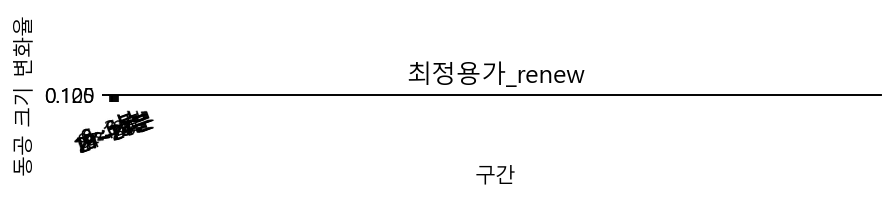

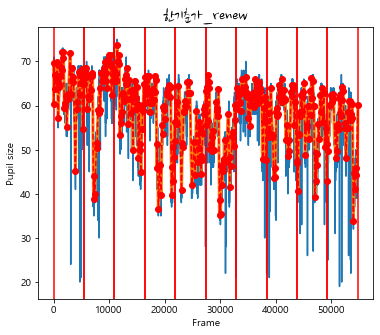

허남일가_renew.csv
avg of  허남일가_renew  :  72.38537689854067
before 60507
<class 'list'>
[89, 89, 90, 91, 91, 90, 90, 90, 91, 90, 90, 90, 91, 88, 89, 88, 90, 90, 90, 89, 91, 90, 90, 88, 78, 0, 0, 89, 91, 91]
middle 60507
after 56425
len 0
len 55860
len 55860
low_val= (4379822-0j) 
 after highpass =  (4379822-0j)
기울기 너무 클때 제외 1
프레임 [4034]
0  : 큰기울기 :  0.07333481403339448 0.0003301161673766119 
avg 0.024466179282605947 fir_avg 0.026082674236899424 value [0.08912597745434504]
길이 39
section =  0
기울기 너무 클때 제외 3
프레임 [10451, 10613]
1  : 큰기울기 :  0.06540955797335596 0.0005046028303993921 
avg 0.02273414370006178 fir_avg 0.03187854621859322 value [0.22359461548195, 0.20593857769649415]
길이 40
section =  1
기울기 너무 클때 제외 3
프레임 []
2  : 큰기울기 :  0.03902521536464298 0.0010853326903108337 
avg 0.019343791808812617 fir_avg 0.019343791808812617 value []
길이 39
section =  2
기울기 너무 클때 제외 3
프레임 []
3  : 큰기울기 :  0.05670492509359629 0.0018225821971537214 
avg 0.022393102649453794 fir_avg 0.022393102649453794 value []


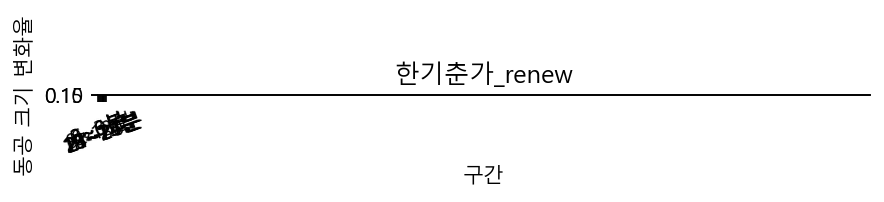

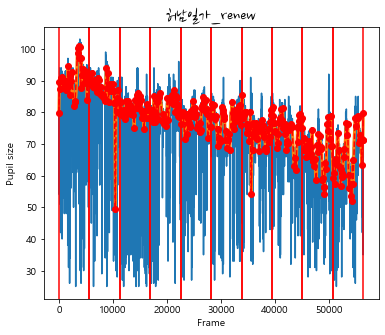

홍기중가_renew.csv
avg of  홍기중가_renew  :  30.6164077716023
before 42102
<class 'list'>
[48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47]
middle 42102
after 33956
len 0
len 33617
len 33617
low_val= (1291883-0j) 
 after highpass =  (1291883-0j)
기울기 너무 클때 제외 0
프레임 []
0  : 큰기울기 :  0.07281839275607696 0.006709389533641443 
avg 0.03028130091273216 fir_avg 0.03028130091273216 value []
길이 18
section =  0
기울기 너무 클때 제외 0
프레임 []
1  : 큰기울기 :  0.0914303501849837 0.0008025800366074582 
avg 0.03564749616379069 fir_avg 0.03564749616379069 value []
길이 19
section =  1
기울기 너무 클때 제외 0
프레임 []
2  : 큰기울기 :  0.06772192752181187 0.003572412565351071 
avg 0.03133342622177139 fir_avg 0.03133342622177139 value []
길이 17
section =  2
기울기 너무 클때 제외 0
프레임 []
3  : 큰기울기 :  0.11446804144488865 0.0038854346367589443 
avg 0.04600774724461854 fir_avg 0.04600774724461854 value []
길이 20
section =  3
기울기 너무 클때 제외 1
프레임 [15730]
4  : 큰기울기 :  0.061812207495747944 

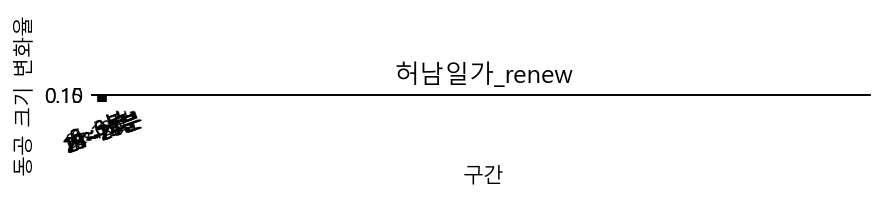

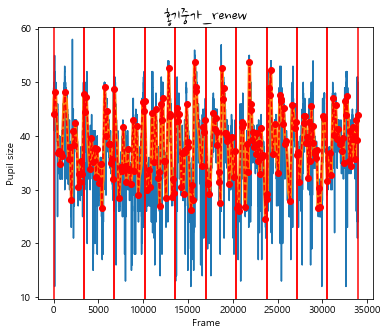

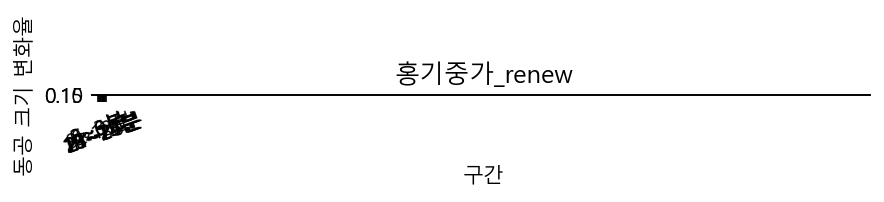

In [88]:
print(my_array)
for i, csv_name in enumerate(csvs_name[:]):
    ## 기울기 오류 값 저장
    count_over_change_rate = 0
    
    print(csv_name)
    csv = pd.read_csv(f'{csvs_dir}/{csv_name}')
    y = csv['pupil_size_diameter'].tolist()
    # y = y[12838:13938]
    average_change_rate_list = [[] for _ in range(len(csvs_name))]

    ext = os.path.splitext(csv_name)

    except_ext = ext[0]

    name = './pupil_changerate/pupil_size_CR_' + except_ext + '.csv'

    print("avg of ",except_ext ,' : ',np.mean(y))
    print('before', len(y))
    print(type(y))
    print(y[0:30])    
    ## 0 제거 하는 코드.
    #  y = numpy_zero_to_nan(y, np.mean(y))
    print('middle', len(y))
    while 0 in y:
        y.remove(0)
    while -1 in y:
        y.remove(-1)
    y = np.array(y)
    x = np.arange(0, len(y))

    print('after', len(y))
    num_total_frame = len(y)
    section_frames = int(num_total_frame/10)
    # print(type(y), y.shape)
    if not int(num_total_frame / section_frames) >= 7:
        # 데이터가 원하는 섹션만큼 안나눠지면 pass
        real_length -= 1
        print('real_length : ', real_length)
        print('except', i)
        filtered_sig, l1, l2 = get_filtered_data(y, 0.005, 0.003) 
        # print(filtered_sig)
        filtered_sig = filtered_sig.astype(np.float)
        print('low_val=', l1,'\n after highpass = ', l2)
        pass
    else:
        # fft
        filtered_sig, l1, l2 = get_filtered_data(y, 0.005, 0.003) 
        # print(filtered_sig)
        filtered_sig = filtered_sig.astype(np.float)
        print('low_val=', l1,'\n after highpass = ', l2)
        
        # zero-crossing point
        zero_crossings = np.where(np.diff(np.sign(np.diff(filtered_sig))))[0]
        zero_crossings = np.insert(zero_crossings, 0, 0)
        zero_crossings = np.append(zero_crossings, len(filtered_sig)-1)

        # 원본, fft 비교 확인을 위한 그래프 그리기


        plt.figure(figsize=(6, 5))
        plt.title(except_ext, fontproperties=fontprop)
        plt.plot(x, y, label='Original signal')
        plt.plot(x, filtered_sig, linewidth=3, label='Filtered signal')
        plt.plot(zero_crossings, filtered_sig[zero_crossings], marker='o', color='red', linestyle='--')
        # plt.xlim(46400, 46700)
        # plt.ylim(82, 95)
        # plt.xlim(13000,14000)


        # 변화 속도 계산
        change_rates_list = [[] for _ in range(int(num_total_frame / section_frames))]
#         change_rates_list[0].append(1)
        for section in range(int(num_total_frame / section_frames)):
            # zero-crossing points 기준으로 원하는 위치(섹션) 가져오기
            section_zero_crossing = zero_crossings[np.where(zero_crossings <= (section+1)*section_frames)]
            section_zero_crossing = section_zero_crossing[np.where(section*section_frames < section_zero_crossing)]

            # 변화 속도 계산
#             change_rate = []
#             for j in range(len(section_zero_crossing) - 1):
#                 change_rate = abs((filtered_sig[section_zero_crossing[j+1]] - 
#                                    filtered_sig[section_zero_crossing[j]]) / 
#                                   (section_zero_crossing[j+1] - section_zero_crossing[j]))
# 주석 풀면 기울기 큰값 평균으로 제거 
            average_first = []
            over_change_rate_value = []
            over_change_rate_list = []
            first_avg = 0
#                 if j == 0:
            for j in range(len(section_zero_crossing) - 1):
                change_rate = abs((filtered_sig[section_zero_crossing[j+1]] - 
                                   filtered_sig[section_zero_crossing[j]]) / (section_zero_crossing[j+1] -
                                                                              section_zero_crossing[j]))
                average_first.append(change_rate)
#                       change_rates_list[section].append(change_rate)

                ## 기울기 너무 클때 이상 값 저장 및 갯 수 파악
#                         count_over_change_rate += 1
#                         over_change_rate_list.append(section_zero_crossing[j+1])
#                         pass
            first_avg = np.mean(average_first)
            for j in range(len(section_zero_crossing) - 1):
                change_rate = abs((filtered_sig[section_zero_crossing[j+1]] - 
                                   filtered_sig[section_zero_crossing[j]]) / 
                                  (section_zero_crossing[j+1] - 
                                   section_zero_crossing[j]))
                ## 크거나 작은 변화율을 제거 """change_rate < first_avg*3 and change_rate > first_avg/1.5"""
                if change_rate < first_avg*3 :
                    change_rates_list[section].append(change_rate)
                else:
                    ## 기울기 너무 클때 이상 값 저장 및 갯 수 파악
                    count_over_change_rate += 1
                    over_change_rate_list.append(section_zero_crossing[j+1])
                    over_change_rate_value.append(change_rate)
                    pass                      
#                 else:
# # 입력값으로 기울기 제거
#                     if change_rate < 1.5:
#                         change_rates_list[section].append(change_rate)
#                     else:
#                         ## 기울기 너무 클때 이상 값 저장 및 갯 수 파악
#                         count_over_change_rate += 1
#                         over_change_rate_list.append(section_zero_crossing[j+1])
#                         pass
            print('기울기 너무 클때 제외', count_over_change_rate)
            print('프레임', over_change_rate_list)
            print(section,' : 큰기울기 : ', np.max(change_rates_list[section]),
                  np.min(change_rates_list[section]),'\navg',
                  np.mean(change_rates_list[section]),'fir_avg',first_avg,
                 'value',over_change_rate_value)
            print('길이', len(change_rates_list[section]))
            print('section = ' ,section)
#                 print(change_rates_list)
            # 섹션 나눠진거 표시
            plt.axvline(x=section*section_frames, ymin=0, ymax=1.0, color='r')
            plt.axvline(x=(section+1) * section_frames, ymin=0, ymax=1.0, color='r')
        test=[]

        # 전체 평균(전체 대상)을 내기위한 저장
        # average_change_rate_list[i].append(except_ext)
        for ii, change_rate in enumerate(change_rates_list):
            if change_rate:
                average_change_rate = sum(change_rate) / len(change_rate)
                print('sum', sum(change_rate), 'len' , len(change_rate))
                print(test)
                average_change_rate_list[i].append(average_change_rate)
                # data = [average_change_rate_list]
                # print('i=',i,'ii=', ii ,average_change_rate_list)
                # print(f'Average change rate - Section {ii + 1} : {average_change_rate}')
                # save_data = pd.DataFrame(average_change_rate_list)
                # save_data.to_csv(name, header=except_ext, index = False)
                ##### 여기서 test에 평균 변화율 저장하고
                test.append(average_change_rate)
                # my_array = np.insert(my_array, [i, ii], average_change_rate)

                # my_array[ii].append(average_change_rate)
                # wr = csv.writer(save_cr_list[ii])
                # wr.writerow([ii, average_change_rate])
        empty_box = 12
        print('len',len(test))
        if(len(test) < empty_box):
            for i in range(empty_box - len(test)):
                test.append(None)
            print(test)
            
        else:
            pass
        test = normalize_data(test)
        my_array.append(test)
#         print(my_array)
        longest_col.append(len(test))
        # print(np.shape(my_array))
        # save_data = pd.DataFrame(my_array)
        # save_data.to_csv(name, header=except_ext, index = False)



        # print(test)
        # print(my_array)
        # obj = np.squeeze.average_change_rate_list
        # print(obj)
        # 그래프 표시
        plt.xlabel('Frame')
        plt.ylabel('Pupil size')
        plt.show()
        draw_graph(test, csv_name[0:4], '동공 크기 변화율', f"./img/{except_ext}.png")
# print(my_array)
# print(len(my_array[0]))
# print(len(kyung_list),len(my_array))

In [31]:
a = f"./img/{except_ext}_동공크기변화율.png"
print(a[6:10])

홍기중가


In [19]:
print(csv_name[0:4])

홍기중가


In [13]:
# print((change_rates_list))
for i in range (len(change_rates_list)):
    print(np.max(change_rates_list[i]))

0.07281839275607696
0.0914303501849837
0.06772192752181187
0.11446804144488865
0.1366435193104454
0.1455319785078674
0.12761409309535302
0.10125786325768385
0.0819380915998516
0.07565433259503727


In [ ]:

print(y)
count =0
for i in range(len(y)):
    if y[i] < 20:
        print('y=0', y[i])
        count += 1 
    else:
        pass
print(count)

In [20]:
print(len(y))

33956


# draw part of rate
## calculate point of change rate

ValueError: x and y must have same first dimension, but have shapes (51892,) and (36038,)

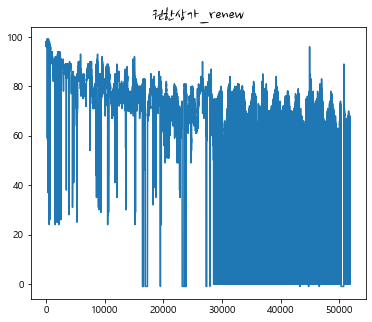

In [60]:
x = np.arange(0, len(y))
x2  = np.arange(0, len(filtered_sig))
plt.figure(figsize=(6, 5))
plt.title(except_ext, fontproperties=fontprop)
plt.plot(x, y, label='Original signal')
plt.plot(x, filtered_sig, linewidth=3, label='Filtered signal')
plt.plot(zero_crossings, filtered_sig[zero_crossings], marker='o', color='red', linestyle='--')
plt.xlabel('Frame')
plt.ylabel('Pupil size')
plt.xlim(20000, 24000)
# plt.ylim(20, 50)
plt.show()
print(abs((filtered_sig[section_zero_crossing[23]] - 
                                   filtered_sig[section_zero_crossing[22]]) / 
                                  (section_zero_crossing[23] - 
                                   section_zero_crossing[22])))
print('j+1 :', section_zero_crossing[23],'\n',
     'j :', section_zero_crossing[22],'\n',
     'filtered_val j+1 :' , filtered_sig[section_zero_crossing[23]], '\n',
     'filtered_val j :', filtered_sig[section_zero_crossing[22]], '\n')

ValueError: x and y must have same first dimension, but have shapes (57788,) and (36038,)

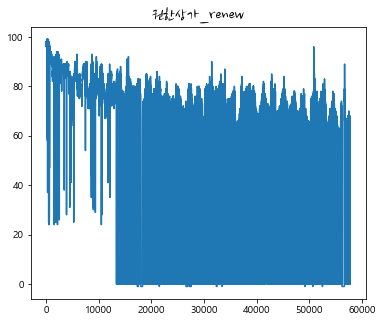

In [57]:
x = np.arange(0, len(y))
x2  = np.arange(0, len(filtered_sig))
plt.figure(figsize=(6, 5))
plt.title(except_ext, fontproperties=fontprop)
plt.plot(x, y, label='Original signal')
plt.plot(x, filtered_sig, linewidth=3, label='Filtered signal')
plt.plot(zero_crossings, filtered_sig[zero_crossings], marker='o', color='red', linestyle='--')
plt.xlabel('Frame')
plt.ylabel('Pupil size')
plt.xlim(33000, 34000)
# plt.ylim(20, 50)
plt.show()
print(abs((filtered_sig[section_zero_crossing[23]] - 
                                   filtered_sig[section_zero_crossing[22]]) / 
                                  (section_zero_crossing[23] - 
                                   section_zero_crossing[22])))
print('j+1 :', section_zero_crossing[23],'\n',
     'j :', section_zero_crossing[22],'\n',
     'filtered_val j+1 :' , filtered_sig[section_zero_crossing[23]], '\n',
     'filtered_val j :', filtered_sig[section_zero_crossing[22]], '\n')

# calculate average and append

In [89]:
for k in range(np.max(longest_col)): #10 np.max(longest_col) or len(my_array[k])
    # print("myarray length :", len(my_array[k]))
    for j in range(real_length): #3
        if my_array[j][k] is not None:
#             sum_column = sum_column+my_array[j][k]
        # print(j,k)
            print('[',j,',',k,'] =', my_array[j][k])
            avg_col.append(my_array[j][k])
    # print(avg_col)
    avg_column = np.mean(avg_col)
    # print(avg_column)
    last_column.append(avg_column)
#     sum_column = 0
    avg_col=[]
    k +=1


[ 0 , 0 ] = 0.08108628557934676
[ 1 , 0 ] = 0.08213229107153448
[ 2 , 0 ] = 0.06358011911448994
[ 3 , 0 ] = 0.07391087263404317
[ 4 , 0 ] = 0.13385965268690797
[ 5 , 0 ] = 0.10853146600643676
[ 6 , 0 ] = 0.09159448978491921
[ 7 , 0 ] = 0.09792794162540701
[ 8 , 0 ] = 0.07069939919014012
[ 9 , 0 ] = 0.08949804196757108
[ 10 , 0 ] = 0.08306634987417472
[ 11 , 0 ] = 0.0797373283372641
[ 12 , 0 ] = 0.07586774663955968
[ 13 , 0 ] = 0.07098092661982444
[ 14 , 0 ] = 0.10253283253625052
[ 15 , 0 ] = 0.09809577638403688
[ 16 , 0 ] = 0.07582590578605464
[ 17 , 0 ] = 0.06989571624388626
[ 18 , 0 ] = 0.09734095572104846
[ 19 , 0 ] = 0.07627186798269811
[ 20 , 0 ] = 0.08336668288290269
[ 21 , 0 ] = 0.07926251452360863
[ 22 , 0 ] = 0.1184025900432694
[ 23 , 0 ] = 0.09852189803729429
[ 24 , 0 ] = 0.09425799729029408
[ 25 , 0 ] = 0.09802048146611352
[ 26 , 0 ] = 0.1027260620196251
[ 27 , 0 ] = 0.08740228296080041
[ 0 , 1 ] = 0.1139298281942823
[ 1 , 1 ] = 0.0892870386304579
[ 2 , 1 ] = 0.0880747062993

# save csv

In [90]:
my_array.append(last_column)
save_data = pd.DataFrame(my_array)
save_data.to_csv('./pupil_changerate/3mul_005_003_all.csv', header=except_ext, index=False)



    # average_of_quarter = my_array[]

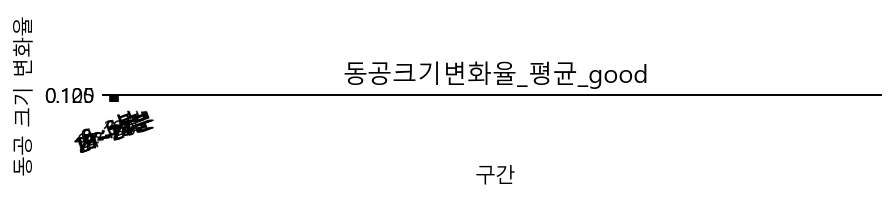

In [85]:
draw_graph(last_column, csv_name, '동공 크기 변화율', f"./img/동공크기변화율_평균_good.png")


[[0.026254821414339068, 0.032666247250525166, 0.03841221716142969, 0.03535238264393194, 0.028627412825290615, 0.030109531535476453, 0.022918649478373083, 0.03179970728314622, 0.028550934293154875, 0.025026456101175425, None, None], [0.03780786619947709, 0.03692833384291644, 0.04569106182664381, 0.04738017147847251, 0.02749327288284635, 0.0393684428641595, 0.05073924971160028, 0.04264384312377991, 0.053040235459747835, 0.020122394289920735, None, None], [0.02082015332856017, 0.030836073521660207, 0.03885004665644156, 0.025955419385517462, 0.04356481442900174, 0.03005249852269073, 0.04424572544376536, 0.03656648432902311, 0.028656282947610884, 0.04124952382053153, None, None], [0.020446914808848807, 0.02277206561384611, 0.020016841252322528, 0.023065379129877762, 0.028339649858760193, 0.03042218460906123, 0.03166607292628133, 0.03462975280107821, 0.031021118850958835, 0.03825677270534641, None, None], [0.028110856633327956, 0.02960462050376135, 0.016029508062735464, 0.016352291466315772,

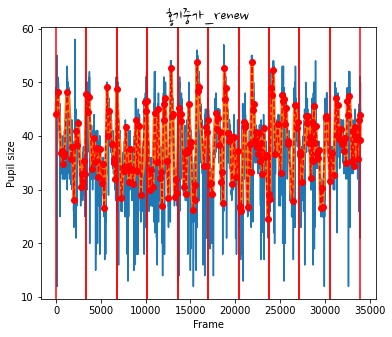

In [53]:
print(my_array)
# for i, csv_name in enumerate(csvs_name[:]):
## 기울기 오류 값 저장
i=0
csv_name = '홍기중가_renew.csv'
count_over_change_rate = 0

print(csv_name)
csv = pd.read_csv(f'{csvs_dir}/{csv_name}')
y = csv['pupil_size_diameter'].tolist()
# y = y[12838:13938]
average_change_rate_list = [[] for _ in range(len(csvs_name))]

ext = os.path.splitext(csv_name)

except_ext = ext[0]

name = './pupil_changerate/pupil_size_CR_' + except_ext + '.csv'

print("avg of ",except_ext ,' : ',np.mean(y))
print('before', len(y))
print(type(y))
print(y[0:30])    
## 0 제거 하는 코드.
#  y = numpy_zero_to_nan(y, np.mean(y))
print('middle', len(y))
while 0 in y:
    y.remove(0)
while -1 in y:
    y.remove(-1)
y = np.array(y)
x = np.arange(0, len(y))

print('after', len(y))
num_total_frame = len(y)
section_frames = int(num_total_frame/10)
# print(type(y), y.shape)
if not int(num_total_frame / section_frames) >= 7:
    # 데이터가 원하는 섹션만큼 안나눠지면 pass
    real_length -= 1
    print('real_length : ', real_length)
    print('except', i)
    filtered_sig = get_filtered_data(y, 0.005) #0.05 is best
    # print(filtered_sig)
    filtered_sig = filtered_sig.astype(np.float)
    pass
else:
    # fft
    filtered_sig = get_filtered_data(y, 0.005) #0.05 is best
    # print(filtered_sig)
    filtered_sig = filtered_sig.astype(np.float)

    # zero-crossing point
    zero_crossings = np.where(np.diff(np.sign(np.diff(filtered_sig))))[0]
    zero_crossings = np.insert(zero_crossings, 0, 0)
    zero_crossings = np.append(zero_crossings, len(filtered_sig)-1)

    # 원본, fft 비교 확인을 위한 그래프 그리기


    plt.figure(figsize=(6, 5))
    plt.title(except_ext, fontproperties=fontprop)
    plt.plot(x, y, label='Original signal')
    plt.plot(x, filtered_sig, linewidth=3, label='Filtered signal')
    plt.plot(zero_crossings, filtered_sig[zero_crossings], marker='o', color='red', linestyle='--')
    # plt.xlim(46400, 46700)
    # plt.ylim(82, 95)
    # plt.xlim(13000,14000)


    # 변화 속도 계산
    change_rates_list = [[] for _ in range(int(num_total_frame / section_frames))]
#         change_rates_list[0].append(1)
    for section in range(int(num_total_frame / section_frames)):
        # zero-crossing points 기준으로 원하는 위치(섹션) 가져오기
        section_zero_crossing = zero_crossings[np.where(zero_crossings <= (section+1)*section_frames)]
        section_zero_crossing = section_zero_crossing[np.where(section*section_frames < section_zero_crossing)]

        # 변화 속도 계산
#             change_rate = []
#             for j in range(len(section_zero_crossing) - 1):
#                 change_rate = abs((filtered_sig[section_zero_crossing[j+1]] - 
#                                    filtered_sig[section_zero_crossing[j]]) / 
#                                   (section_zero_crossing[j+1] - section_zero_crossing[j]))
# 주석 풀면 기울기 큰값 평균으로 제거 
        average_first = []
        over_change_rate_value = []
        over_change_rate_list = []
        first_avg = 0
#                 if j == 0:
        for j in range(len(section_zero_crossing) - 1):
            change_rate = abs((filtered_sig[section_zero_crossing[j+1]] - 
                               filtered_sig[section_zero_crossing[j]]) / (section_zero_crossing[j+1] -
                                                                          section_zero_crossing[j]))
            average_first.append(change_rate)
#                       change_rates_list[section].append(change_rate)

            ## 기울기 너무 클때 이상 값 저장 및 갯 수 파악
#                         count_over_change_rate += 1
#                         over_change_rate_list.append(section_zero_crossing[j+1])
#                         pass
        first_avg = np.mean(average_first)
        for j in range(len(section_zero_crossing) - 1):
            change_rate = abs((filtered_sig[section_zero_crossing[j+1]] - 
                               filtered_sig[section_zero_crossing[j]]) / 
                              (section_zero_crossing[j+1] - 
                               section_zero_crossing[j]))
            if change_rate < first_avg*2 and change_rate > first_avg/2:
                change_rates_list[section].append(change_rate)
            else:
                ## 기울기 너무 클때 이상 값 저장 및 갯 수 파악
                count_over_change_rate += 1
                over_change_rate_list.append(section_zero_crossing[j+1])
                over_change_rate_value.append(change_rate)
                pass                      
#                 else:
# # 입력값으로 기울기 제거
#                     if change_rate < 1.5:
#                         change_rates_list[section].append(change_rate)
#                     else:
#                         ## 기울기 너무 클때 이상 값 저장 및 갯 수 파악
#                         count_over_change_rate += 1
#                         over_change_rate_list.append(section_zero_crossing[j+1])
#                         pass
        print('기울기 너무 클때 제외', count_over_change_rate)
        print('프레임', over_change_rate_list)
        print(section,' : 큰기울기 : ', np.max(change_rates_list[section]),
              np.min(change_rates_list[section]),'\navg',
              np.mean(change_rates_list[section]),'fir_avg',first_avg,
             'value',over_change_rate_value)
        print('길이', len(change_rates_list[section]))
        print('section = ' ,section)
#                 print(change_rates_list)
        # 섹션 나눠진거 표시
        plt.axvline(x=section*section_frames, ymin=0, ymax=1.0, color='r')
        plt.axvline(x=(section+1) * section_frames, ymin=0, ymax=1.0, color='r')
    test=[]

    # 전체 평균(전체 대상)을 내기위한 저장
    # average_change_rate_list[i].append(except_ext)
    for ii, change_rate in enumerate(change_rates_list):
        if change_rate:
            average_change_rate = sum(change_rate) / len(change_rate)
            print('sum', sum(change_rate), 'len' , len(change_rate))
            print(test)
            average_change_rate_list[i].append(average_change_rate)
            # data = [average_change_rate_list]
            # print('i=',i,'ii=', ii ,average_change_rate_list)
            # print(f'Average change rate - Section {ii + 1} : {average_change_rate}')
            # save_data = pd.DataFrame(average_change_rate_list)
            # save_data.to_csv(name, header=except_ext, index = False)
            test.append(average_change_rate)
            # my_array = np.insert(my_array, [i, ii], average_change_rate)

            # my_array[ii].append(average_change_rate)
            # wr = csv.writer(save_cr_list[ii])
            # wr.writerow([ii, average_change_rate])
    empty_box = 12
    print('len',len(test))
    if(len(test) < empty_box):
        for i in range(empty_box - len(test)):
            test.append(None)
        print(test)

    else:
        pass
    my_array.append(test)
#         print(my_array)
    longest_col.append(len(test))
    # print(np.shape(my_array))
    # save_data = pd.DataFrame(my_array)
    # save_data.to_csv(name, header=except_ext, index = False)



    # print(test)
    # print(my_array)
    # obj = np.squeeze.average_change_rate_list
    # print(obj)
    # 그래프 표시
    plt.xlabel('Frame')
    plt.ylabel('Pupil size')
    plt.show()
# print(my_array)
# print(len(my_array[0]))
# print(len(kyung_list),len(my_array))

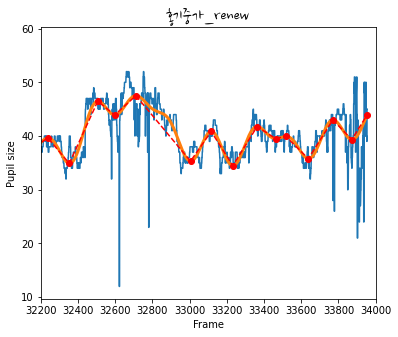

0.00743719417972076
j+1 : 33517 
 j : 33462 
 filtered_val j+1 : 39.93931023121244 
 filtered_val j : 39.5302645513278 



In [81]:
x = np.arange(0, len(y))
x2  = np.arange(0, len(filtered_sig))
plt.figure(figsize=(6, 5))
plt.title(except_ext, fontproperties=fontprop)
plt.plot(x, y, label='Original signal')
plt.plot(x, filtered_sig, linewidth=3, label='Filtered signal')
plt.plot(zero_crossings, filtered_sig[zero_crossings], marker='o', color='red', linestyle='--')
plt.xlabel('Frame')
plt.ylabel('Pupil size')
plt.xlim(32200, 34000)
# plt.ylim(20, 50)
plt.show()
fir = 20

la = fir-1
print(abs((filtered_sig[section_zero_crossing[fir]] - 
                                   filtered_sig[section_zero_crossing[la]]) / 
                                  (section_zero_crossing[fir] - 
                                   section_zero_crossing[la])))
print('j+1 :', section_zero_crossing[fir],'\n',
     'j :', section_zero_crossing[la],'\n',
     'filtered_val j+1 :' , filtered_sig[section_zero_crossing[fir]], '\n',
     'filtered_val j :', filtered_sig[section_zero_crossing[la]], '\n')

In [4]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [14]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

In [16]:
print(fs)
print(np.shape(f), np.shape(Pxx_den))
print(x)

10000.0
(50001,) (50001,)
[ 3.93368101  0.68483091  2.32401334 ... -1.06220407 -2.99538234
 -1.20417927]


(50001,) (50001,)


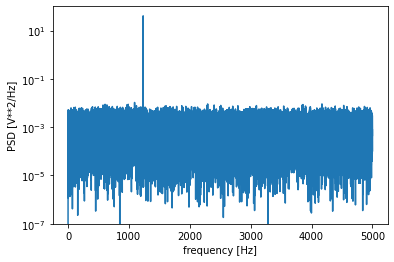

In [10]:
f, Pxx_den = signal.periodogram(x, fs)
print(np.shape(f), np.shape(Pxx_den))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [9]:
print(np.shape(f), np.shape(Pxx_den))

(50001,) (50001,)


FileNotFoundError: [Errno 2] No such file or directory: 'Sample_ECG_PEAK.mat'